In [5]:
import pyscan as ps
import matplotlib.pyplot as plt
import numpy as np

In [6]:
devices = ps.ItemAttribute()

devices.v1 = ps.TestVoltage()
devices.v2 = ps.TestVoltage()

In [7]:
def generate_multiD_data(expt):
    """
    Generates fake data proportinal to scanX.i
    x1 - 0D data (point)
    x2 - 1D data (line/array)
    x3 - 2D data (2D array)
    """
     
    runinfo = expt.runinfo
    devices = expt.devices

    d = ps.ItemAttribute()

    v = runinfo.scan0.i + runinfo.scan1.i*runinfo.scan0.n + \
           runinfo.scan2.i*runinfo.scan0.n*runinfo.scan1.n + \
           runinfo.scan3.i*runinfo.scan0.n*runinfo.scan1.n*runinfo.scan2.n
    
    d.x1 = v
    d.x2 = [v+i for i in range(5)]
    d.x3 = [[v+i+j for i in range(5)] for j in range(5)]
    
    return d

# 1D Scan 0D Data

In [8]:
runinfo = ps.RunInfo()

runinfo.scan0 = ps.PropertyScan({'v1': ps.drange(0, 0.01, 1)}, prop='voltage', dt=0.01)
# runinfo.scan1 = ps.PropertyScan({'v2': ps.drange(0, 0.1, 1)}, prop='voltage')

runinfo.measure_function = generate_multiD_data

expt = ps.Sweep(runinfo, devices)
expt.start_thread()


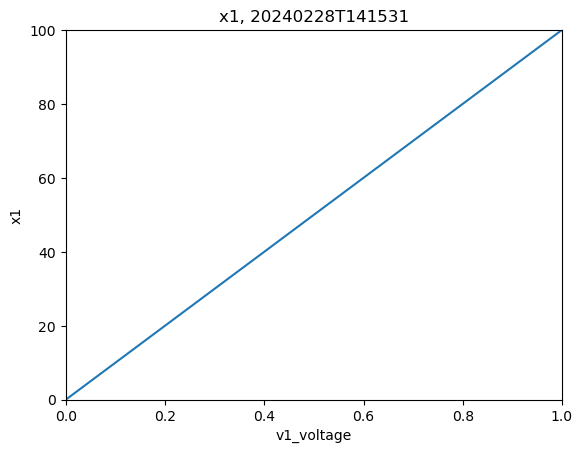

In [9]:
ps.live_plot1D(expt, data_name='x1')

# 1D Scan 1D Data

In [10]:
runinfo = ps.RunInfo()

runinfo.scan0 = ps.PropertyScan({'v1': ps.drange(0, 0.01, 1)}, prop='voltage', dt=0.01)

runinfo.measure_function = generate_multiD_data

expt = ps.Sweep(runinfo, devices)
expt.start_thread()


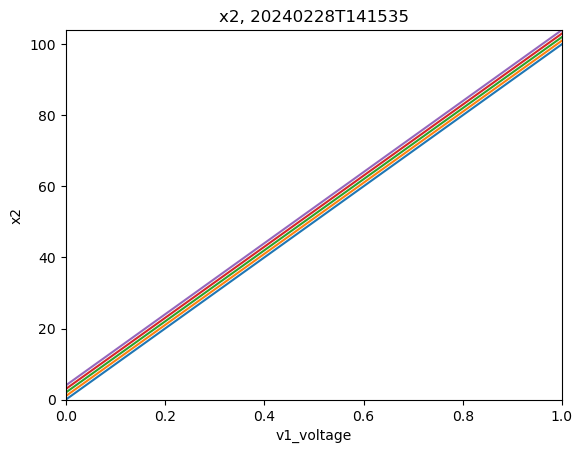

In [11]:
ps.live_plot1D(expt, data_name='x2')

# 1D Scan 2D Data

In [12]:
runinfo = ps.RunInfo()

runinfo.scan0 = ps.PropertyScan({'v1': ps.drange(0, 0.01, 1)}, prop='voltage', dt=0.01)

runinfo.measure_function = generate_multiD_data

expt = ps.Sweep(runinfo, devices)
expt.start_thread()


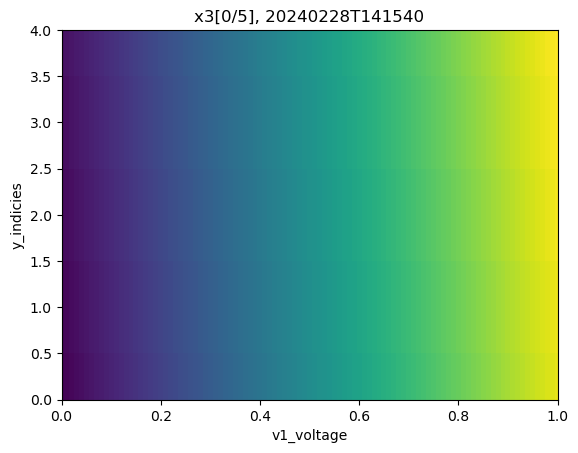

In [13]:
ps.live_plot2D(expt, data_name='x3')

# 2D Scan 0D Data

In [14]:
runinfo = ps.RunInfo()

runinfo.scan0 = ps.PropertyScan({'v1': ps.drange(0, 0.01, 1)}, prop='voltage', dt=0.01)
runinfo.scan1 = ps.PropertyScan({'v2': ps.drange(0, 0.1, 1)}, prop='voltage', dt=0.01)

runinfo.measure_function = generate_multiD_data

expt = ps.Sweep(runinfo, devices)
expt.start_thread()


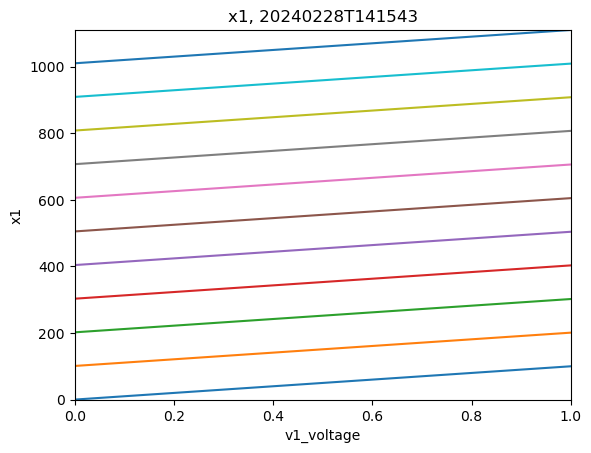

In [15]:
try:
    ps.live_plot1D(expt, data_name='x1')
except KeyboardInterrupt:
    expt.stop()


In [16]:
runinfo = ps.RunInfo()

runinfo.scan0 = ps.PropertyScan({'v1': ps.drange(0, 0.01, 1)}, prop='voltage', dt=0.001)
runinfo.scan1 = ps.PropertyScan({'v2': ps.drange(0, 0.1, 1)}, prop='voltage')

runinfo.measure_function = generate_multiD_data

expt = ps.Sweep(runinfo, devices)
expt.start_thread()


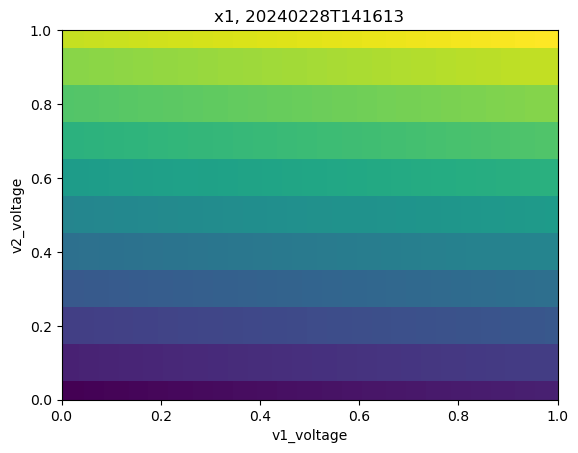

In [17]:
ps.live_plot2D(expt, data_name='x1')